<a href="https://colab.research.google.com/github/Jodick-Ndayisenga/ML_Intro/blob/main/weight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINEAR REGRESSION ON HEIGHT AND WEIGHT**
1. Setup and Import Libraries

First, we need to set up our environment and import the necessary libraries.

Explanation:
We use pandas for data manipulation, numpy for numerical operations, matplotlib for plotting, and scikit-learn for machine learning tasks.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

2. Load Data

Load our dataset into a pandas DataFrame. also we are using read csv because our data is in csv format

In [ ]:
data = pd.read_csv('/content/complex_height_weight_data.csv')

3. Explore Data

Here we are checking the first few rows and summary statistics to understand our data.

Explanation:
I am using head() to see the first few rows and describe() for summary statistics. and info() to provide information about data types and missing values.

In [ ]:
data.head()

,Height,Weight
0,174.97 Cm,91.66 kg
1,168.62 Cm,93.78 Kg
2,176.48 Cm,97.7 kG
3,185.23 cm,99.34 KG
4,167.66 Cm,94.64 kG


Below, I am going to visualize our data using various plots to gain insights. so that we can make better decision and understand more about our data distibution and patterns.
we also want to see whether there is any correlation between height and weight. data enbalance etc.

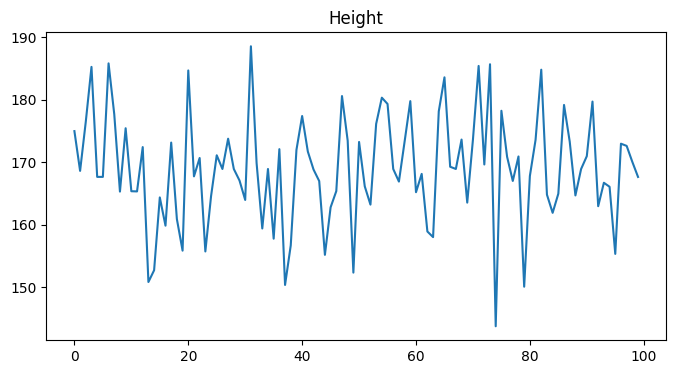

In [ ]:
# @title Height

from matplotlib import pyplot as plt
data['Height'].plot(kind='line', figsize=(8, 4), title='Height')
plt.gca().spines[['top', 'right']].set_visible(True)

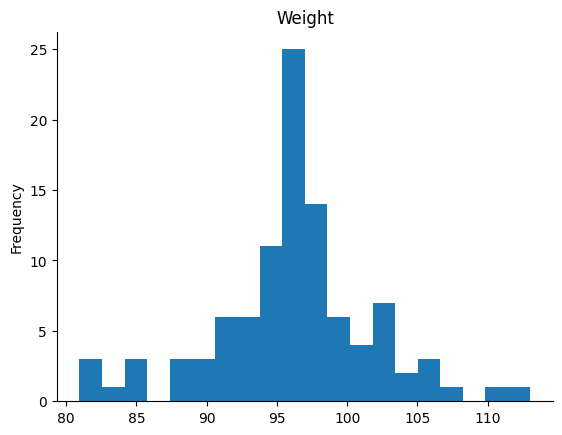

In [ ]:
# @title Weight

from matplotlib import pyplot as plt
data['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

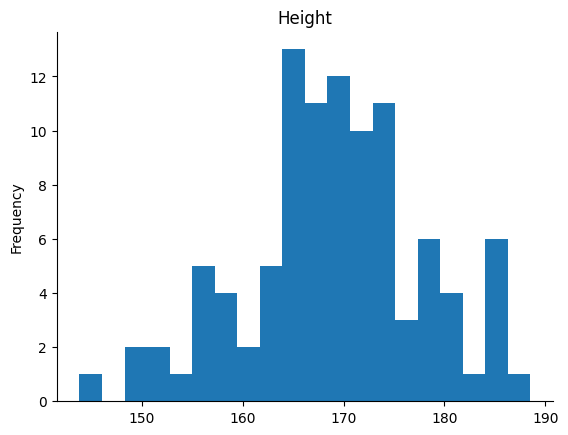

In [ ]:
# @title Height

from matplotlib import pyplot as plt
data['Height'].plot(kind='hist', bins=20, title='Height')
plt.gca().spines[['top', 'right',]].set_visible(False)

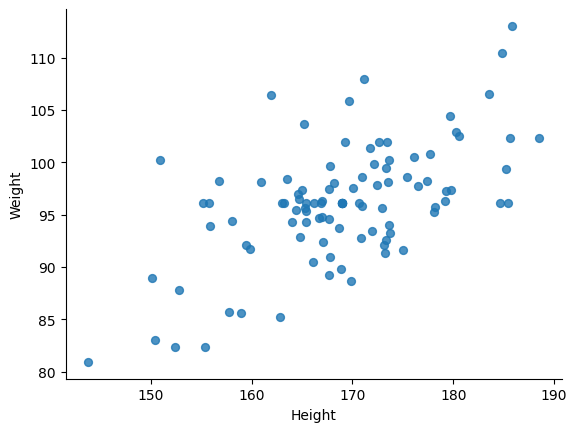

In [ ]:
# @title Height vs Weight

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Height', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(data.head())
print(data.describe())
print(data.info())


           Height        Weight
0    174.97 Cm       91.66 kg  
1    168.62 Cm       93.78 Kg  
2    176.48 Cm        97.7 kG  
3    185.23 cm       99.34 KG  
4    167.66 Cm       94.64 kG  
           Height    Weight
count         100       100
unique         97        88
top       ? cm       ? KG  
freq            3         5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  100 non-null    object
 1   Weight  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB
None


4. Preprocess Data

In this step, I will convert height and weight from string to numerical values and handle missing values.

Explanation:

    I want to xtract numerical values from strings and
    Fill missing values with the mean of the respective columns.

We also can use data.sample() to get a view of the overall data

In [ ]:
data.sample(15)

,Height,Weight
68,173.62 Cm,94.03 KG
66,169.28 cm,101.97 Kg
49,152.37 CM,82.38 Kg
45,162.8 CM,85.22 KG
24,164.56 cM,96.99 Kg
60,165.21 CM,103.67 kG
51,166.15 CM,? Kg
0,174.97 Cm,91.66 kg
3,185.23 cm,99.34 KG
36,172.09 Cm,99.81 KG


If we look closely, data is in string format. Further, for height, it has CM as suffix and letter are mixed. In some case, we have them all in uppercase or lowercase or even mixed in some cases.

to make the work easy for us, we convert them all to lowercase, and then remove them.

In [ ]:
data['Height'] = data['Height'].str.lower() # changing all string to lowercase
data['Weight'] = data['Weight'].str.lower() # changing all string to lowercase

In [ ]:
data["Height"]= data["Height"].str.replace(" cm","") # Remplacing the cm spaces with empty string
data["Weight"]= data["Weight"].str.replace(" kg","") # Replacing the kg with empty string

In [ ]:
data.head()

,Height,Weight
0,174.97,91.66
1,168.62,93.78
2,176.48,97.7
3,185.23,99.34
4,167.66,94.64


In [ ]:
def is_number(s):
  try:
    float(s)
    return True
  except ValueError:
    return False

In [ ]:
def convert_and_fill(data, column_name):
  """
  This function checks whether a string in a specific column is a digit.
  If yes, it converts it to float. Otherwise, it computes the average of the
  column and fills the missing value with the average.
  """
  is_numeric = data[column_name].apply(lambda x: is_number(x))
  data[column_name] = data[column_name].apply(lambda x: float(x) if is_number(x) else np.nan)
  data[column_name].fillna(data[column_name].mean(), inplace=True)

convert_and_fill(data, "Height")
convert_and_fill(data, "Weight")

In [ ]:
data.sample(15)

,Height,Weight
83,164.820000,92.850000
66,169.280000,101.970000
93,166.720000,94.660000
90,170.970000,95.820000
58,173.310000,99.450000
11,165.340000,94.270000
24,164.560000,96.990000
41,171.710000,101.340000
89,168.922021,96.141548
60,165.210000,103.670000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  100 non-null    float64
 1   Weight  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


5. Split Data

On step 5, I am separating the features (height) and the target (weight), then split the data into training and testing sets.

It is very important to note that weight in our target variable ( dependant ) and height is our indepant ( input ) variable.

Explanation:

    train_test_split is used to split the data into training and testing sets.

In [ ]:
X = data['Height']  # Feature
y = data['Weight']  # Target

Reshaping our data using array.reshape(-1, 1) because our data has a single feature or array.reshape(1, -1).

In [ ]:
X = X.values.reshape(-1, 1)  # Reshape to 2D array
y = y.values.reshape(-1, 1)  # Reshape to 2D array

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6. Train the Model

Initialization and training of the linear regression model.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

7. Evaluate the Model

In order to evaluate my mode, I will make predictions on the test set and evaluate the model’s performance.

Explanation:

. I will use mean_squared_error and r2_score to evaluate model performance.

In [ ]:
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 12.19953563904987
R-squared: 0.24241732569640162


8. Visualize Results

Visualize the training data and the model’s predictions.

Explanation:

1. Scatter plot of actual data and a line plot of model predictions.

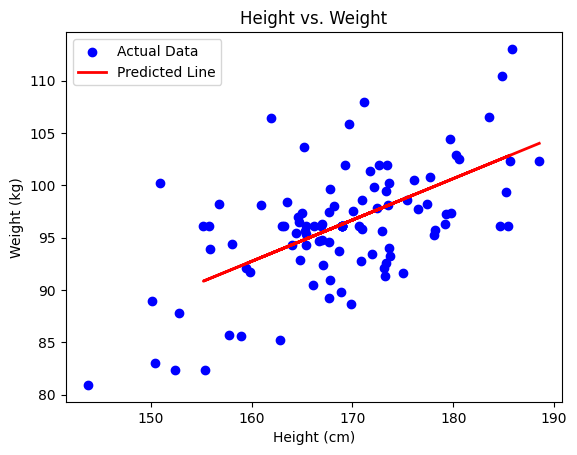

In [ ]:
# Scatter plot of actual data
plt.scatter(X, y, color='blue', label='Actual Data')

# Line plot of model predictions
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')

plt.title('Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()
